#Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In This Capstone project we will be analysing the sentiment of tweets based on  COVID-19 tweets. Where we will analyse,compile,visulize and summarize the tweet and also perform feature Engineering on tweets. 

The Main Objective of the Project is to build a classification model which predicts the sentiment of tweets.

In [ ]:
#Import Required libraries
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Reading dataset
tweet_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone/Dataset/Coronavirus Tweets.csv',engine='python')
tweet_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
print('The Shape of the dataset is: {} which contains `{}` features and `{}` number of examples'
.format(tweet_data.shape,tweet_data.shape[1],tweet_data.shape[0]))

The Shape of the dataset is: (41157, 6) which contains `6` features and `41157` number of examples


* The dataset contain  6 features out of which `Sentiment` Feature is dependent feature and other 5 features are independent features. 
* UserName and ScreenName are not required as it doesn't add any importance to predict the sentiment hence those features will be removed.

In [ ]:
tweet_data.drop(columns=['UserName','ScreenName'],axis=1,inplace=True)
tweet_data.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#Find if the Dataset contains and NULL Values
tweet_data.isnull().sum()

Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Only the Location feature contains 8590 Null values

In [ ]:
#Print random tweets
random_number = [23,678,7890,40000]
for number in random_number:
  print(tweet_data['OriginalTweet'][number])
  print('------'*30)






Just DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #ipTv IPTVLinks #18Movies
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hey are likely to make a fortune from boom in online shopping due to Are you going to ensure they pay fair UK tax We ll need that income for recovery Wouldn t the EU Tax Avoidance Directive be useful right now
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------






? 45mins of #cycling outside on #balcony ? #peloton #app https://t.co/yORuCQ0X8X
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The Era Of Ch

### Different type of tweet based on Sentiment

In [ ]:
tweet_data['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
print('Positive Tweet Example:')
print(tweet_data[tweet_data['Sentiment']=='Positive']['OriginalTweet'][1])
print('\n')
print('Neutral Tweet Example:')
print(tweet_data[tweet_data['Sentiment']=='Neutral']['OriginalTweet'][17])
print('\n')
print('Extremely Negative Tweet Example:')
print(tweet_data[tweet_data['Sentiment']=='Extremely Negative']['OriginalTweet'][42])
print('\n')
print('Negative Tweet Example:')
print(tweet_data[tweet_data['Sentiment']=='Negative']['OriginalTweet'][41127])
print('\n')
print('Extremely Positive Tweet Example:')
print(tweet_data[tweet_data['Sentiment']=='Extremely Positive']['OriginalTweet'][41142])

Positive Tweet Example:
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order


Neutral Tweet Example:

https://t.co/4WnrrK9oKC https://t.co/ld05k5Eyns


Extremely Negative Tweet Example:
CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No food ? in USA market due to coronavirus panic we gonna die from starvation #CoronavirusOutbreak #coronavirus #houston #nofood #Notoiletpaper #NoHandShakes #nohandsanitizer #COVID19 #pandemic #totallockdown #COVID2019usa #walmart https://t.co/ztN3iMkgpD


Negative Tweet Example:
Today at the grocery store I saw someone getting a case of #Corona beer and I was about to jokingly say 'hey man i see you got Corona' then I stopped myself doing that thinking it would be the new version of yelling fire in a movie theater #COVID2019 #COVID19 #QuarantineLife


Extremely Positive Tweet Ex

In [ ]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       32567 non-null  object
 1   TweetAt        41157 non-null  object
 2   OriginalTweet  41157 non-null  object
 3   Sentiment      41157 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


# Cleaning The Dataset
Tweet contains special characters and url's which has to be removed 

In [ ]:
# Removing URLS's
remove_url = lambda x:re.sub(r'https\S+','',str(x))
new_tweet = tweet_data['OriginalTweet'].apply(remove_url)

#Removing Punctuations
tweet_punc = lambda x:x.translate(str.maketrans('','',string.punctuation))
new_tweet = new_tweet.apply(tweet_punc)

#Removing Stopwords
stop = stopwords.words('english')
stop_tweet = lambda x: ' '.join([w for w in x.split() if w not in stop])
new_tweet = new_tweet.apply(stop_tweet)

#Converting to lower case
tweet_lower = lambda x:x.lower()
new_tweet = new_tweet.apply(tweet_lower)

In [ ]:
#Comparision 
print('Original Tweet: \n',tweet_data['OriginalTweet'][45])
print('----'*20)
print('Cleaned Tweet: \n',new_tweet[45])

Original Tweet: 



#Covid_19 https://t.co/pzirO10avf
--------------------------------------------------------------------------------
Cleaned Tweet: 
 south africans stock food basic goods coronavirus panic hits coronavirussa covid19


In [ ]:
#Replace the old tweet column with the new_tweet
tweet_data['OriginalTweet'] = new_tweet
tweet_data.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,menyrbie philgahan chrisitv,Neutral
1,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive
2,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive
3,NaN,16-03-2020,my food stock one empty please dont panic ther...,Positive
4,NaN,16-03-2020,me ready go supermarket covid19 outbreak not i...,Extremely Negative


# Feature Engineering

In [ ]:
#Find the length of tweet
tweet_data['Tweet_length'] = tweet_data['OriginalTweet'].apply(lambda x:len(x))
tweet_data.head()

,Location,TweetAt,OriginalTweet,Sentiment,Tweet_length
0,London,16-03-2020,menyrbie philgahan chrisitv,Neutral,27
1,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive,196
2,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive,101
3,NaN,16-03-2020,my food stock one empty please dont panic ther...,Positive,199
4,NaN,16-03-2020,me ready go supermarket covid19 outbreak not i...,Extremely Negative,206


In [ ]:
tweet_data.describe(include='all')

,Location,TweetAt,OriginalTweet,Sentiment,Tweet_length
count,32567,41157,41157,41157,41157.000000
unique,12220,30,41011,5,NaN
top,London,20-03-2020,,Positive,NaN
freq,540,3448,10,11422,NaN
mean,NaN,NaN,NaN,NaN,142.115849
std,NaN,NaN,NaN,NaN,50.919184
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,102.000000
50%,NaN,NaN,NaN,NaN,149.000000
75%,NaN,NaN,NaN,NaN,183.000000


* Positive tweet has the Highest Count which is 11422
* There are 5 Unique type of tweets
* Location has 12220 unique values
* TweetAt which is time has 30 unique values which means that the Tweet data is for 30 days interval.

## Exploratory Data Analysis

In [ ]:
#function for adding percentage on top of the count bars
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()+150
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

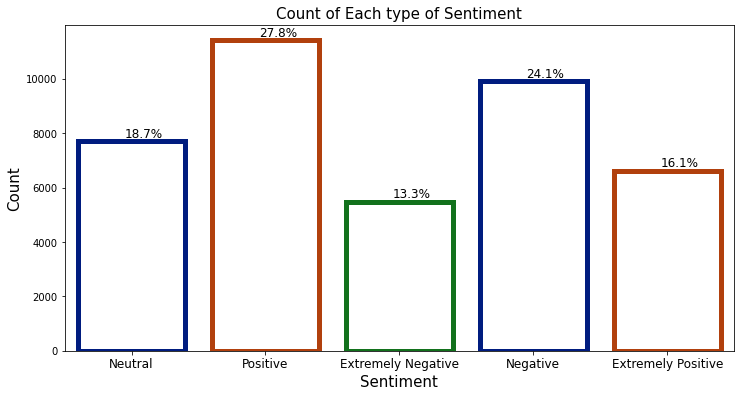

In [ ]:
#Finding the unique count of each kind of sentiment
plt.figure(figsize=(12,6))
ax = sns.countplot(tweet_data['Sentiment'],edgecolor=sns.color_palette("dark", 3),facecolor = (0,0,0,0),linewidth = 5)
plt.xticks(size=12)
plt.xlabel('Sentiment',size=15)
plt.ylabel('Count',size=15)
plt.title('Count of Each type of Sentiment',size=15)
without_hue(ax,tweet_data.Sentiment)
plt.show()


* With the above plot we can see that `positive` and `negative` sentiments counts are quite high as compared with the other kind of sentiment.
*`Extremely negative` has the lowest count.
* The Sentiment is equally distributed .

In [ ]:
#Sentiment
tweet_data['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

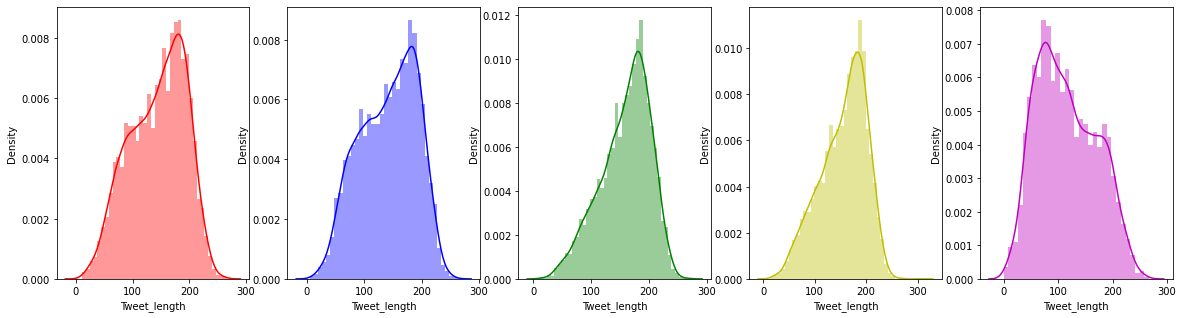

In [ ]:
# Distribution of message Length for each type of Sentiment
fig,ax=plt.subplots(1,5,figsize=(20,5))
tweet_length_positive = tweet_data.loc[tweet_data['Sentiment'] == 'Positive','Tweet_length']
tweet_length_Negative = tweet_data.loc[tweet_data['Sentiment'] == 'Negative','Tweet_length']
tweet_length_Extremely_positive = tweet_data.loc[tweet_data['Sentiment'] == 'Extremely Positive','Tweet_length']
tweet_length_Extremely_negative = tweet_data.loc[tweet_data['Sentiment'] == 'Extremely Negative','Tweet_length']
tweet_length_Neutral = tweet_data.loc[tweet_data['Sentiment'] == 'Neutral','Tweet_length']

sns.distplot(tweet_length_positive,ax=ax[0],color='r')
sns.distplot(tweet_length_Negative,ax=ax[1],color='b')
sns.distplot(tweet_length_Extremely_positive,ax=ax[2],color='g')
sns.distplot(tweet_length_Extremely_negative,ax=ax[3],color='y')
sns.distplot(tweet_length_Neutral,ax=ax[4],color='m')

From the Above Distribution plot it can be seen that all the distributions are equally Distributed. Length of the Message doesn't depend on the sentiment of the tweet.

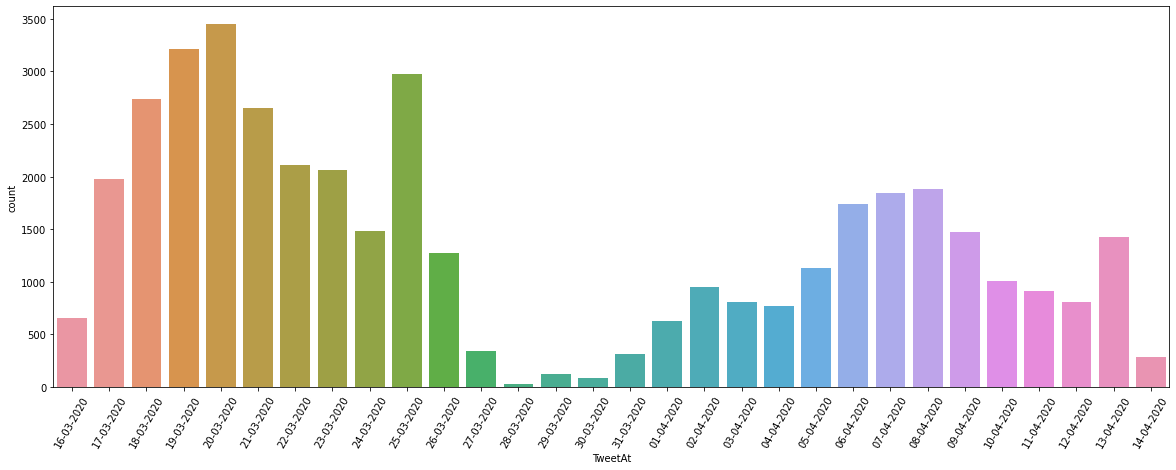

In [ ]:
# Plot the total number of tweets for each day.
plt.figure(figsize=(20,7))
plt.xticks(rotation=60)
sns.countplot(x=tweet_data['TweetAt'])
plt.show()

* Initially the Count of tweets were quite high but gradually the count of tweets related to corona started to decrease.

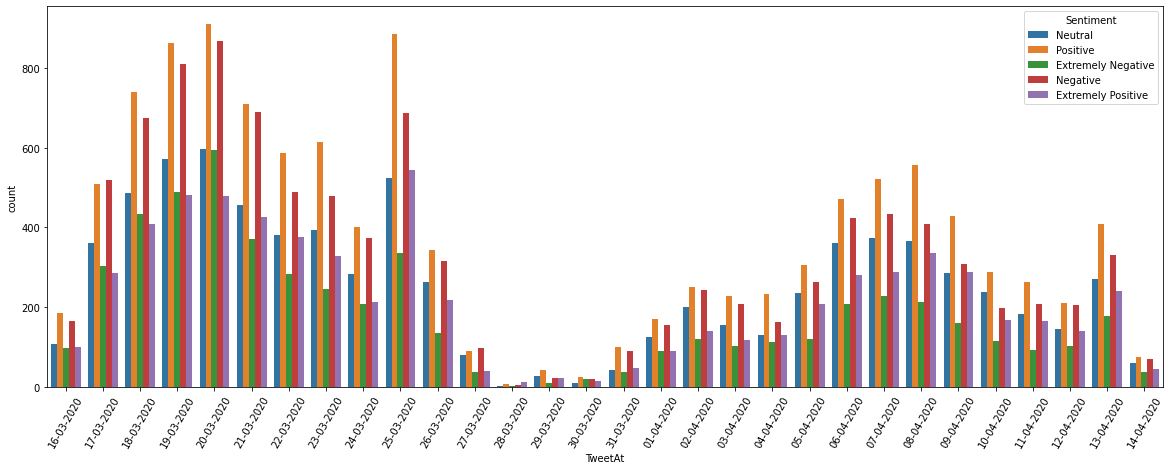

In [ ]:
# Plot the total number of tweets for each day.
plt.figure(figsize=(20,7))
plt.xticks(rotation=60)
sns.countplot(x=tweet_data['TweetAt'],hue=tweet_data['Sentiment'])
plt.show()

* Almost all the days we can see that the Count of Positive tweet was high as compared with other kind of tweets.

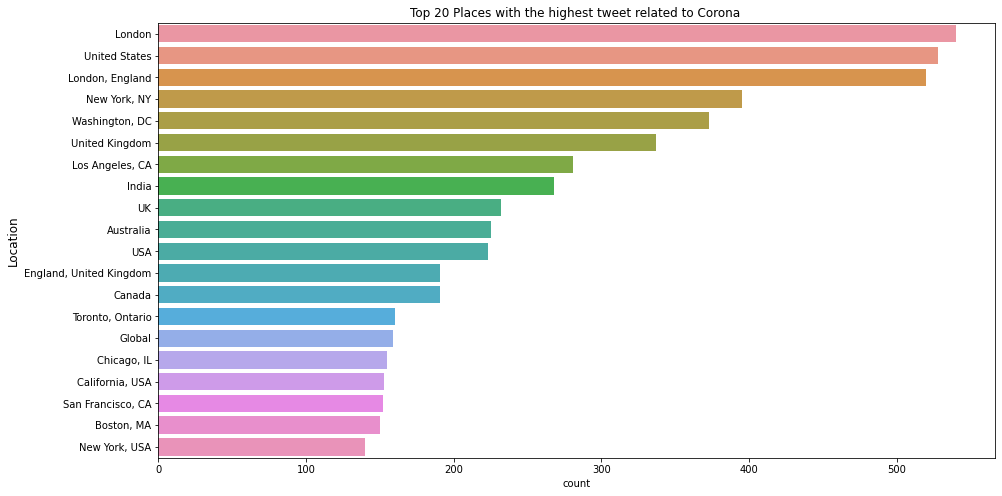

In [ ]:
#Top 20 Places with highest tweets
plt.figure(figsize=(15,8))
plt.title('Top 20 Places with the highest tweet related to Corona ')
plt.ylabel('Location', fontsize=12)
year_count = sns.countplot(y='Location',data=tweet_data,order=tweet_data['Location'].value_counts().index[:20])

# Visulizing the Coronovirus Tweets

In [ ]:
tweet_data.head()

,Location,TweetAt,OriginalTweet,Sentiment,Tweet_length
0,London,16-03-2020,menyrbie philgahan chrisitv,Neutral,27
1,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive,196
2,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive,101
3,NaN,16-03-2020,my food stock one empty please dont panic ther...,Positive,199
4,NaN,16-03-2020,me ready go supermarket covid19 outbreak not i...,Extremely Negative,206


In [ ]:
#Tokenization of the tweet
tweet_data['Tokenized_tweet'] = tweet_data['OriginalTweet'].apply(lambda x: word_tokenize(x))

In [ ]:
tweet_data.head()

,Location,TweetAt,OriginalTweet,Sentiment,Tweet_length,Tokenized_tweet
0,London,16-03-2020,menyrbie philgahan chrisitv,Neutral,27,"[menyrbie, philgahan, chrisitv]"
1,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive,196,"[advice, talk, neighbours, family, exchange, p..."
2,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive,101,"[coronavirus, australia, woolworths, give, eld..."
3,NaN,16-03-2020,my food stock one empty please dont panic ther...,Positive,199,"[my, food, stock, one, empty, please, dont, pa..."
4,NaN,16-03-2020,me ready go supermarket covid19 outbreak not i...,Extremely Negative,206,"[me, ready, go, supermarket, covid19, outbreak..."


In [ ]:
tweet_positive = tweet_data.loc[tweet_data['Sentiment'] == 'Positive','Tokenized_tweet']
tweet_Negative = tweet_data.loc[tweet_data['Sentiment'] == 'Negative','Tokenized_tweet']
tweet_Extremely_positive = tweet_data.loc[tweet_data['Sentiment'] == 'Extremely Positive','Tokenized_tweet']
tweet_Extremely_negative = tweet_data.loc[tweet_data['Sentiment'] == 'Extremely Negative','Tokenized_tweet']
tweet_Neutral = tweet_data.loc[tweet_data['Sentiment'] == 'Neutral','Tokenized_tweet']

## Positive Tweets Most Common Words

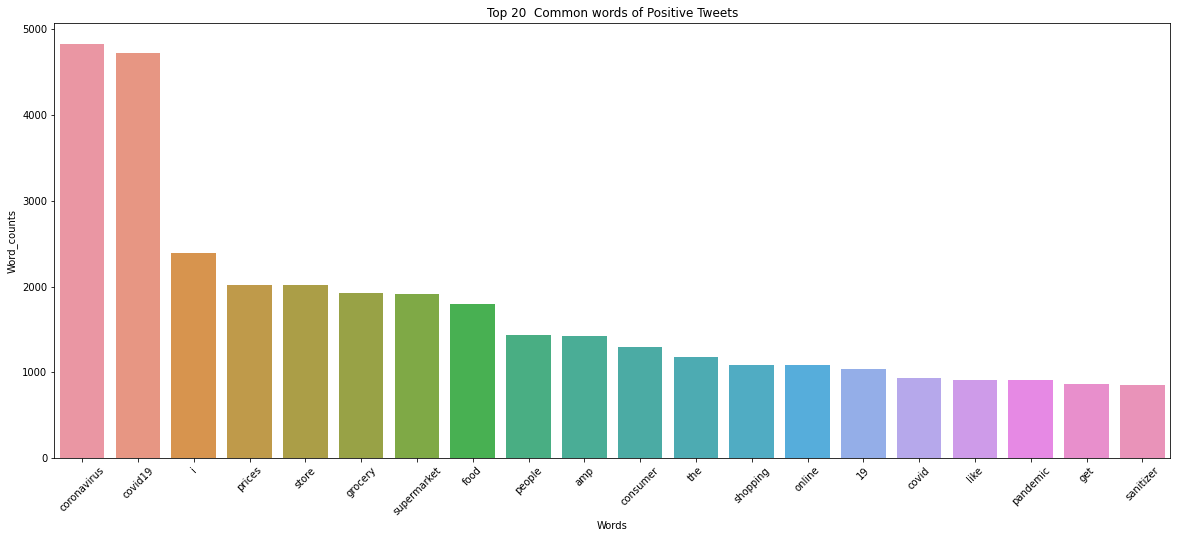

In [ ]:
#Join all words in the tokenized tweets
pos_words = []
for w in tweet_positive:
  pos_words+=w

# Count each type of words
pos_words = Counter(pos_words)

# Most common words
pos_words_top_20 = pos_words.most_common(20)
pos_words_df = pd.DataFrame(dict(pos_words_top_20).items(),columns=['Words','Word_counts'])


#Visulize the most common words
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title('Top 20  Common words of Positive Tweets')
sns.barplot(x='Words',y='Word_counts',data=pos_words_df)
plt.show()

# Negative Tweet Most common words

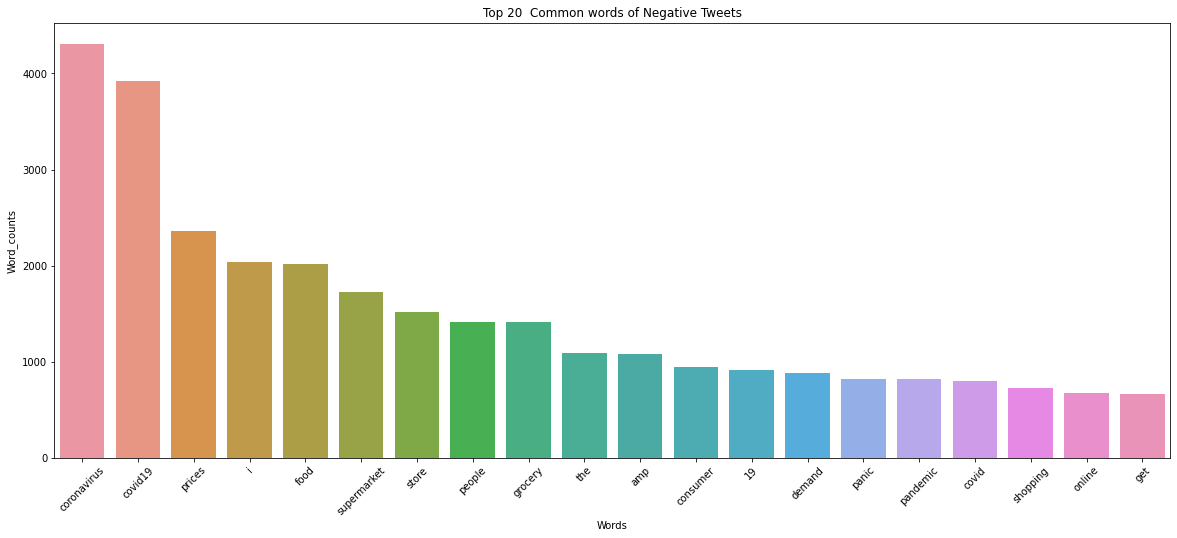

In [ ]:
#Join all words in the tokenized tweets
neg_words = []
for w in tweet_Negative:
  neg_words+=w

# Count each type of words
neg_words = Counter(neg_words)

# Most common words
neg_words_top_20 = neg_words.most_common(20)
neg_words_df = pd.DataFrame(dict(neg_words_top_20).items(),columns=['Words','Word_counts'])


#Visulize the most common words
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title('Top 20  Common words of Negative Tweets')
sns.barplot(x='Words',y='Word_counts',data=neg_words_df)
plt.show()

# Neutral Tweet Most common words

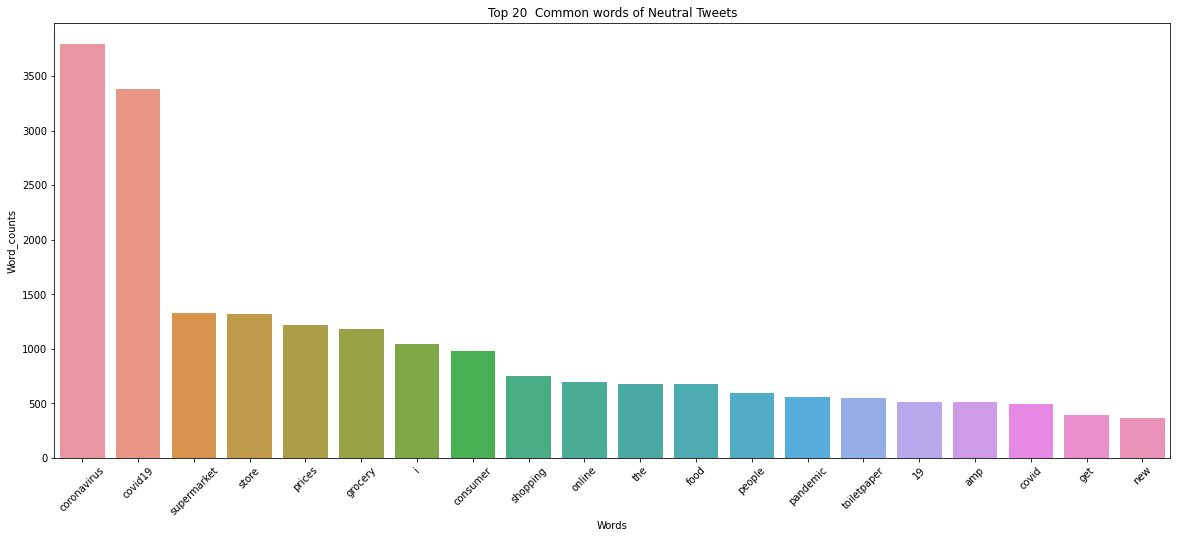

In [ ]:
#Join all words in the tokenized tweets
neutral_words = []
for w in tweet_Neutral:
  neutral_words+=w

# Count each type of words
neutral_words = Counter(neutral_words)

# Most common words
neutral_words_top_20 = neutral_words.most_common(20)
neutral_words_df = pd.DataFrame(dict(neutral_words_top_20).items(),columns=['Words','Word_counts'])


#Visulize the most common words
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title('Top 20  Common words of Neutral Tweets')
sns.barplot(x='Words',y='Word_counts',data=neutral_words_df)
plt.show()

# Extremely Positive Tweet Most common words

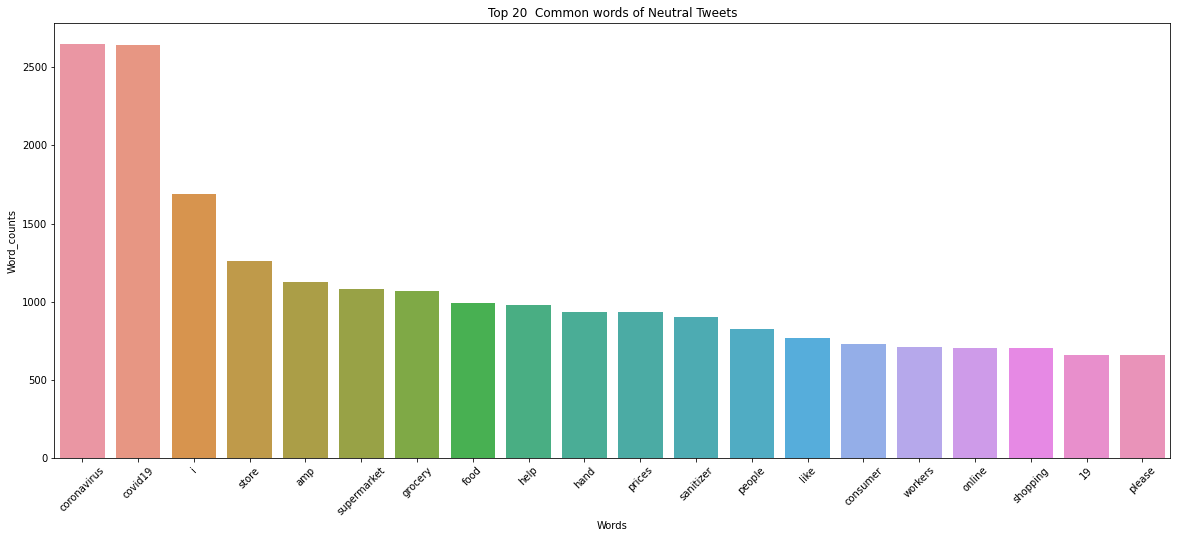

In [ ]:
#Join all words in the tokenized tweets
ext_pos_words = []
for w in tweet_Extremely_positive:
  ext_pos_words+=w

# Count each type of words
ext_pos_words = Counter(ext_pos_words)

# Most common words
ext_pos_words_top_20 = ext_pos_words.most_common(20)
ext_pos_words_df = pd.DataFrame(dict(ext_pos_words_top_20).items(),columns=['Words','Word_counts'])


#Visulize the most common words
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title('Top 20  Common words of Neutral Tweets')
sns.barplot(x='Words',y='Word_counts',data=ext_pos_words_df)
plt.show()

# Extremely Negative Tweet Most common words

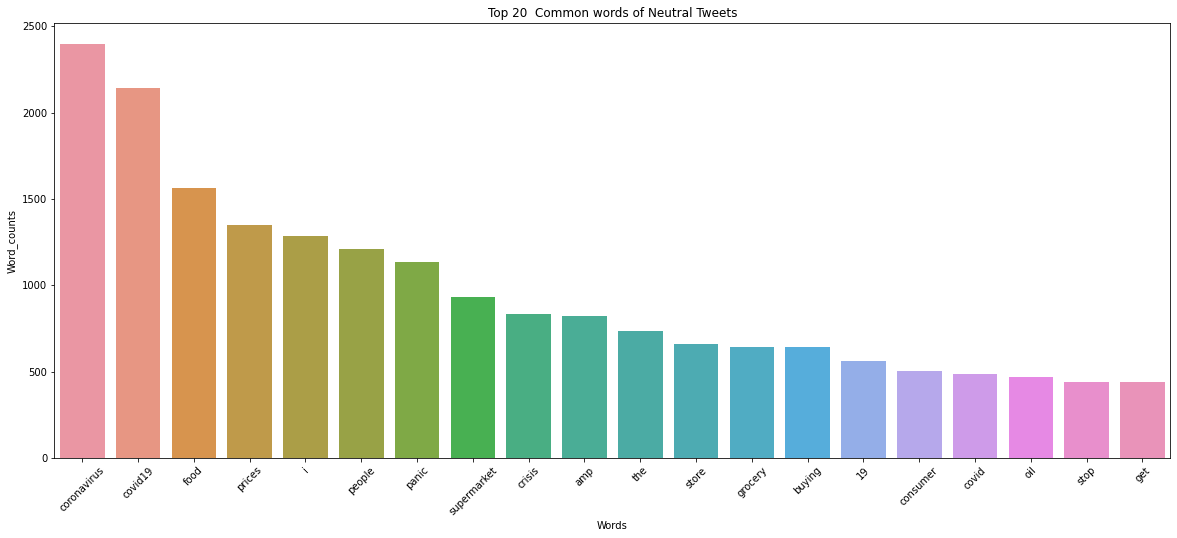

In [ ]:
#Join all words in the tokenized tweets
ext_neg_words = []
for w in tweet_Extremely_negative:
  ext_neg_words+=w

# Count each type of words
ext_neg_words = Counter(ext_neg_words)

# Most common words
ext_neg_words_top_20 = ext_neg_words.most_common(20)
ext_neg_words_df = pd.DataFrame(dict(ext_neg_words_top_20).items(),columns=['Words','Word_counts'])


#Visulize the most common words
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.title('Top 20  Common words of Neutral Tweets')
sns.barplot(x='Words',y='Word_counts',data=ext_neg_words_df)
plt.show()

## Observations:
* Coronavirus is the Most common word in all the type of tweets
* Words such as Food,people,sanitizer,pandemic,Coronavirus are the most common type of words
* All the type of Tweet have the same type of common words

# Building the Model 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# Select the data for training and testing the model
X = tweet_data['OriginalTweet']
y = tweet_data['Sentiment']

### TFidfVectorizer 

In [ ]:
vect_model = TfidfVectorizer()
X_vectorized = vect_model.fit_transform(X)

In [ ]:
#Split the data into training and Testing set
X_train,X_test,y_train,y_test = train_test_split(X_vectorized,y,random_state=8,test_size=0.2,stratify=tweet_data.Sentiment.values)

## LogisticRegression

In [ ]:
Log_model = LogisticRegression()
Log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_model_train = Log_model.predict(X_train)
log_model_test = Log_model.predict(X_test)

In [ ]:
accuracy_score(y_train,log_model_train)

0.8147304479878512

In [ ]:
accuracy_score(y_test,log_model_test)

0.5600097181729835

In [ ]:
reg_param = [0.0001,0.001,0.01,0.1,1,10]

train = []
test = []
for c in reg_param:
  Log_model = LogisticRegression(C=c)
  Log_model.fit(X_train,y_train)
  log_model_train = Log_model.predict(X_train)
  log_model_test = Log_model.predict(X_test)
  train_score = accuracy_score(y_train,log_model_train)
  test_score = accuracy_score(y_test,log_model_test)
  train.append(train_score)
  test.append(test_score)

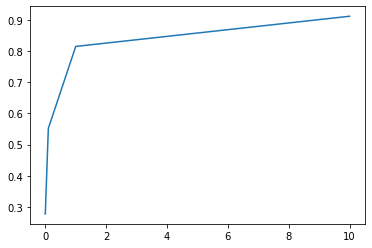

In [ ]:
sns.lineplot(x=reg_param,y=train)

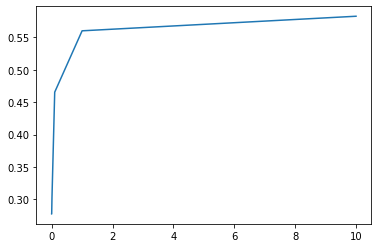

In [ ]:
sns.lineplot(x=reg_param,y=test)

In [ ]:
Log_model = LogisticRegression(C=1000)
Log_model.fit(X_train,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
  log_model_train = Log_model.predict(X_train)
  log_model_test = Log_model.predict(X_test)
  train_score = accuracy_score(y_train,log_model_train)
  test_score = accuracy_score(y_test,log_model_test)

In [ ]:
train_score

0.9402581624905088

In [ ]:
test_score

0.5739795918367347

In [ ]:
Log_model = LogisticRegression(C=10)
Log_model.fit(X_train,y_train)
log_model_train = Log_model.predict(X_train)
log_model_test = Log_model.predict(X_test)
log_train_score = accuracy_score(y_train,log_model_train)
log_test_score = accuracy_score(y_test,log_model_test)
print(log_train_score)
print(log_test_score)

0.911586940015186
0.5824829931972789


* We can see that the model is overfiting, Best Reguralization paramter is `C=10`.

AxesSubplot(0.125,0.125;0.62x0.755)


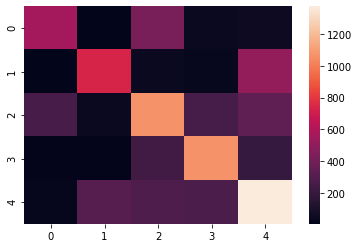

In [ ]:
print(sns.heatmap(confusion_matrix(y_test,log_model_test)))

In [ ]:
print(classification_report(y_test,log_model_test))

                    precision    recall  f1-score   support

Extremely Negative       0.64      0.51      0.57      1096
Extremely Positive       0.66      0.55      0.60      1325
          Negative       0.51      0.54      0.53      1983
           Neutral       0.63      0.69      0.66      1543
          Positive       0.55      0.60      0.58      2285

          accuracy                           0.58      8232
         macro avg       0.60      0.58      0.59      8232
      weighted avg       0.59      0.58      0.58      8232



# Decision Tree

In [ ]:
Decision_model = DecisionTreeClassifier()
Decision_model.fit(X_train,y_train)

Decision_model_train = Decision_model.predict(X_train)
Decision_model_test = Decision_model.predict(X_test)
Decision_train_score = accuracy_score(y_train,Decision_model_train)
Decision_test_score = accuracy_score(y_test,Decision_model_test)
print(Decision_train_score)
print(Decision_test_score)

0.9999088838268793
0.44290573372206027


In [ ]:
print(classification_report(y_test,Decision_model_test))

                    precision    recall  f1-score   support

Extremely Negative       0.45      0.40      0.42      1096
Extremely Positive       0.50      0.44      0.46      1325
          Negative       0.39      0.38      0.39      1983
           Neutral       0.48      0.58      0.53      1543
          Positive       0.42      0.43      0.43      2285

          accuracy                           0.44      8232
         macro avg       0.45      0.44      0.44      8232
      weighted avg       0.44      0.44      0.44      8232



## RandomForestClassifier

In [ ]:
Rand_model = RandomForestClassifier()
Rand_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Rand_model_train = Rand_model.predict(X_train)
Rand_model_test = Rand_model.predict(X_test)
Rand_train_score = accuracy_score(y_train,Rand_model_train)
Rand_test_score = accuracy_score(y_test,Rand_model_test)
print(Rand_train_score)
print(Rand_test_score)

0.9999088838268793
0.5289115646258503


In [ ]:
print(classification_report(y_test,Rand_model_test))

                    precision    recall  f1-score   support

Extremely Negative       0.67      0.36      0.47      1096
Extremely Positive       0.66      0.36      0.47      1325
          Negative       0.48      0.51      0.50      1983
           Neutral       0.56      0.73      0.63      1543
          Positive       0.48      0.59      0.53      2285

          accuracy                           0.53      8232
         macro avg       0.57      0.51      0.52      8232
      weighted avg       0.55      0.53      0.52      8232



## GradientBoostingClassifier

In [ ]:
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train,y_train)

grad_model_train = grad_model.predict(X_train)
grad_model_test = grad_model.predict(X_test)
grad_train_score = accuracy_score(y_train,grad_model_train)
grad_test_score = accuracy_score(y_test,grad_model_test)
print(grad_train_score)
print(grad_test_score)

0.5194533029612757
0.4648931000971817


In [ ]:
print(classification_report(y_test,grad_model_test))

                    precision    recall  f1-score   support

Extremely Negative       0.58      0.42      0.49      1096
Extremely Positive       0.64      0.44      0.52      1325
          Negative       0.45      0.35      0.40      1983
           Neutral       0.52      0.43      0.47      1543
          Positive       0.38      0.62      0.47      2285

          accuracy                           0.46      8232
         macro avg       0.52      0.45      0.47      8232
      weighted avg       0.49      0.46      0.46      8232



## SVC

In [ ]:
support_model = SVC(C=10)
support_model.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
support_model_train = support_model.predict(X_train)
support_model_test = support_model.predict(X_test)
support_train_score = accuracy_score(y_train,support_model_train)
support_test_score = accuracy_score(y_test,support_model_test)
print(support_train_score)
print(support_test_score)

0.9997570235383447
0.6039844509232264


In [ ]:
print(classification_report(y_test,support_model_test))

                    precision    recall  f1-score   support

Extremely Negative       0.72      0.47      0.57      1096
Extremely Positive       0.73      0.50      0.60      1325
          Negative       0.53      0.61      0.57      1983
           Neutral       0.65      0.68      0.67      1543
          Positive       0.56      0.67      0.61      2285

          accuracy                           0.60      8232
         macro avg       0.64      0.59      0.60      8232
      weighted avg       0.62      0.60      0.60      8232



In [ ]:
import xgboost as xgb


xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Test accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.48200455580865603
Test accuracy Score :  0.4402332361516035
                    precision    recall  f1-score   support

Extremely Negative       0.36      0.56      0.44       694
Extremely Positive       0.40      0.63      0.49       836
          Negative       0.32      0.44      0.37      1464
           Neutral       0.40      0.49      0.44      1275
          Positive       0.63      0.36      0.46      3963

          accuracy                           0.44      8232
         macro avg       0.42      0.50      0.44      8232
      weighted avg       0.49      0.44      0.44      8232



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
test_knn = knn_model.predict(X_test)

In [ ]:
knn_test_score = accuracy_score(y_test,test_knn)

In [ ]:
models = ['LogisticRegression','DecisionTree','RandomForestClassifier','GradientBoostingClassifier','SVC','XGboost','KNN']

In [ ]:
model_score = pd.DataFrame(index = models,columns=['Test_score'])
test_score = [log_test_score,Decision_test_score,Rand_test_score,grad_test_score,support_test_score,xgb_accuracy,knn_test_score]

In [ ]:
model_score['Test_score'] = test_score
model_score.sort_values(by='Test_score',ascending=False)

,Test_score
SVC,0.603984
LogisticRegression,0.582483
RandomForestClassifier,0.528912
GradientBoostingClassifier,0.464893
DecisionTree,0.442906
XGboost,0.440233
KNN,0.214893


Support vector Machine is performing well on the Dataset.